<a href="https://colab.research.google.com/github/DARSHAN-R29/Fake-News-Classifier/blob/main/Fake_News_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!ls


Fake.csv  sample_data  True.csv


In [7]:
import pandas as pd

df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")


In [8]:
df_fake['label'] = 'FAKE'
df_true['label'] = 'REAL'


In [9]:
df = pd.concat([df_fake, df_true], axis=0).reset_index(drop=True)
df.head()


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FAKE


In [10]:
df = df[['text', 'label']]  # keep only useful columns
df.dropna(inplace=True)

df['text'] = df['text'].astype(str).str.lower()


In [11]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)


In [13]:
from sklearn.linear_model import PassiveAggressiveClassifier

model = PassiveAggressiveClassifier(max_iter=50)
model.fit(tfidf_train, y_train)


PassiveAggressiveClassifier(max_iter=50)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(tfidf_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9947661469933184


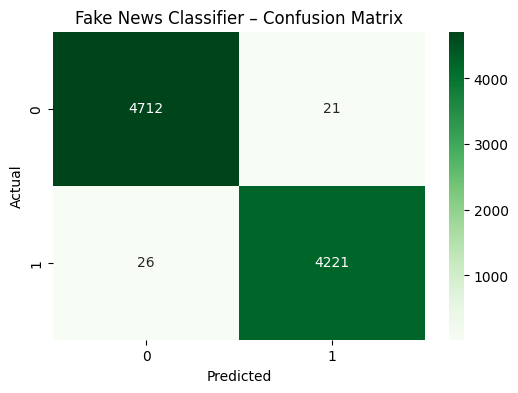

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Fake News Classifier – Confusion Matrix")
plt.show()


In [16]:
test_text = [
    "Breaking: Scientists discover new planet similar to Earth!",
    "Shocking!!! Celebrity arrested for unknown reasons!!!"
]

test_vec = tfidf.transform(test_text)
pred = model.predict(test_vec)

for t, p in zip(test_text, pred):
    print(f"\nText: {t}\nPrediction: {p}")



Text: Breaking: Scientists discover new planet similar to Earth!
Prediction: FAKE

Text: Shocking!!! Celebrity arrested for unknown reasons!!!
Prediction: FAKE


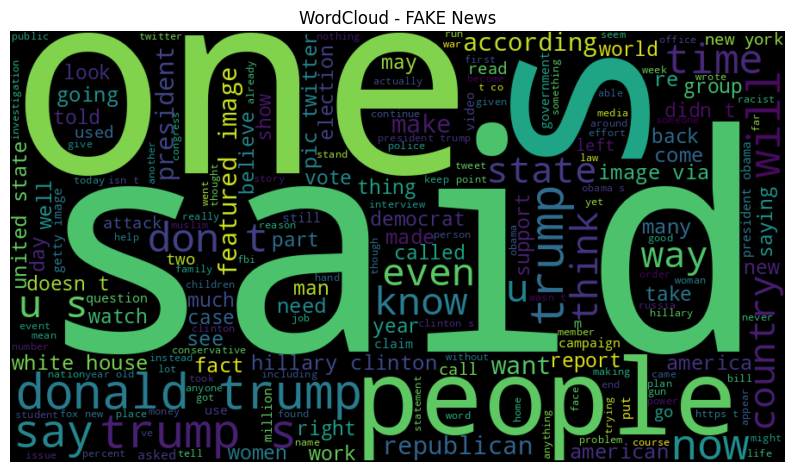

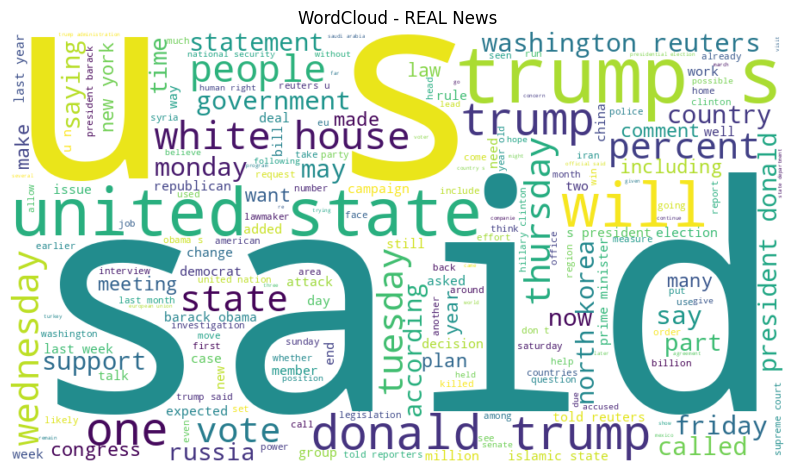

In [17]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate fake and real texts
fake_text = " ".join(df[df['label']=='FAKE']['text'].tolist())
real_text = " ".join(df[df['label']=='REAL']['text'].tolist())

# WordCloud for FAKE news
plt.figure(figsize=(10,6))
wc_fake = WordCloud(width=900, height=500, background_color='black').generate(fake_text)
plt.imshow(wc_fake, interpolation='bilinear')
plt.title("WordCloud - FAKE News")
plt.axis("off")
plt.show()

# WordCloud for REAL news
plt.figure(figsize=(10,6))
wc_real = WordCloud(width=900, height=500, background_color='white').generate(real_text)
plt.imshow(wc_real, interpolation='bilinear')
plt.title("WordCloud - REAL News")
plt.axis("off")
plt.show()


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

models = {
    "Passive Aggressive": PassiveAggressiveClassifier(max_iter=50),
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Linear SVM": LinearSVC()
}

results = {}

for name, model_obj in models.items():
    model_obj.fit(tfidf_train, y_train)
    pred = model_obj.predict(tfidf_test)
    acc = accuracy_score(y_test, pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")


Passive Aggressive Accuracy: 0.9945
Logistic Regression Accuracy: 0.9846
Linear SVM Accuracy: 0.9944


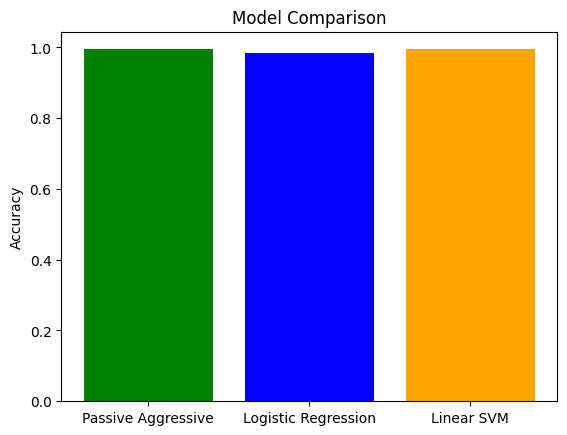

In [19]:
plt.bar(results.keys(), results.values(), color=['green','blue','orange'])
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()


In [20]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [0.01, 0.1, 1, 10],
    'loss': ['hinge', 'squared_hinge']
}

grid = GridSearchCV(LinearSVC(), parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(tfidf_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'C': 10, 'loss': 'squared_hinge'}
Best Accuracy: 0.9929840493531031


In [21]:
import pickle

# Save trained model
with open("fake_news_model.pkl", "wb") as file:
    pickle.dump(grid.best_estimator_, file)

# Save TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as file:
    pickle.dump(tfidf, file)

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


In [23]:
import pickle

loaded_model = pickle.load(open("fake_news_model.pkl", "rb"))
loaded_tfidf = pickle.load(open("tfidf_vectorizer.pkl", "rb"))

print("Model loaded!")



Model loaded!


In [24]:
sample = ["Breaking!!! You won't believe what happened today!"]

sample_vec = loaded_tfidf.transform(sample)
prediction = loaded_model.predict(sample_vec)

print("Prediction:", prediction[0])


Prediction: FAKE
